In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.tail()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
6986  FALSE POSITIVE              0              0              0   
6987  FALSE POSITIVE              0              1              1   
6988       CANDIDATE              0              0              0   
6989  FALSE POSITIVE              0              0              1   
6990  FALSE POSITIVE              0              0              1   

      koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  \
6986              1    8.589871     1.846000e-04    -1.846000e-04   
6987              0    0.527699     1.160000e-07    -1.160000e-07   
6988              0    1.739849     1.780000e-05    -1.780000e-05   
6989              0    0.681402     2.430000e-06    -2.430000e-06   
6990              1    4.856035     6.360000e-05    -6.360000e-05   

      koi_time0bk  koi_time0bk_err1  koi_time0bk_err2  koi_impact  \
6986   132.016100           0.01570          -0.01570       0.765   
6987   131.705093           0.00017          -0.00017       1.252   
6988   133.001270           0.00769          -0.00769       0.043   
6989   132.181750           0.00285          -0.00285       0.147   
6990   135.993300           0.01080          -0.01080       0.134   

      koi_impact_err1  koi_impact_err2  koi_duration  koi_duration_err1  \
6986            0.023           -0.541        4.8060             0.6340   
6987            0.051           -0.049        3.2221             0.0174   
6988            0.423           -0.043        3.1140             0.2290   
6989            0.309           -0.147        0.8650             0.1620   
6990            0.323           -0.134        3.0780             0.2830   

      koi_duration_err2  koi_depth  koi_depth_err1  koi_depth_err2  koi_prad  \
6986            -0.6340       87.7            13.0           -13.0      1.11   
6987            -0.0174     1579.2             4.6            -4.6     29.35   
6988            -0.2290       48.5             5.4            -5.4      0.72   
6989            -0.1620      103.6            14.7           -14.7      1.07   
6990            -0.2830       76.7            10.8           -10.8      1.05   

      koi_prad_err1  koi_prad_err2  koi_teq  koi_insol  koi_insol_err1  \
6986           0.32          -0.23      929     176.40          152.77   
6987           7.70          -2.57     2088    4500.53         3406.38   
6988           0.24          -0.08     1608    1585.81         1537.86   
6989           0.36          -0.11     2218    5713.41         5675.74   
6990           0.36          -0.12     1266     607.42          600.39   

      koi_insol_err2  koi_model_snr  koi_tce_plnt_num  koi_steff  \
6986          -77.60            8.4                 1       5638   
6987        -1175.26          453.3                 1       5638   
6988         -502.22           10.6                 1       6119   
6989        -1836.94           12.3                 1       6173   
6990         -194.33            8.2                 1       6469   

      koi_steff_err1  koi_steff_err2  koi_slogg  koi_slogg_err1  \
6986             169            -152      4.296           0.231   
6987             139            -166      4.529           0.035   
6988             165            -220      4.444           0.056   
6989             193            -236      4.447           0.056   
6990             158            -225      4.385           0.054   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
6986          -0.189     1.088          0.313         -0.228  298.74921   
6987          -0.196     0.903          0.237         -0.079  297.18875   
6988          -0.224     1.031          0.341         -0.114  286.50937   
6989          -0.224     1.041          0.341         -0.114  294.16489   
6990          -0.216     1.193          0.410         -0.137  297.00977   

            dec  koi_kepmag  
6986  46.973351      14.478  
6987  47.093819      14.082  
6988  47.163219      14.757  


In [6]:
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

# Select your features (columns)

In [8]:
df.describe()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    6991.000000    6991.000000    6991.000000    6991.000000   
mean        0.157059       0.244743       0.202975       0.125018   
std         0.363882       0.429966       0.402243       0.330763   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
count  6991.000000     6.991000e+03     6.991000e+03  6991.000000   
mean     56.191248     1.851122e-03    -1.851122e-03   164.488820   
std     117.570962     7.184503e-03     7.184503e-03    67.020475   
min       0.259820     1.100000e-08    -1.568000e-01   120.515914   
25%       2.620126     5.005000e-06    -2.401000e-04   132.683917   
50%       8.947426     3.300000e-05    -3.300000e-05   136.739230   
75%      34.282605     2.401000e-04    -5.005000e-06   169.937005   
max    1071.232624     1.568000e-01    -1.100000e-08  1472.522306   

       koi_time0bk_err1  koi_time0bk_err2   koi_impact  koi_impact_err1  \
count       6991.000000       6991.000000  6991.000000      6991.000000   
mean           0.009340         -0.009340     0.730631         1.945368   
std            0.021989          0.021989     3.346956         9.401850   
min            0.000009         -0.569000     0.000000         0.000000   
25%            0.001145         -0.010000     0.198000         0.039900   
50%            0.003990         -0.003990     0.539000         0.189800   
75%            0.010000         -0.001145     0.891000         0.379000   
max            0.569000         -0.000009   100.806000        85.540000   

       koi_impact_err2  koi_duration  koi_duration_err1  koi_duration_err2  \
count      6991.000000   6991.000000        6991.000000        6991.000000   
mean         -0.337243      5.549368           0.320715          -0.320715   
std           1.349036      6.425205           0.665352           0.665352   
min         -59.320000      0.167000           0.000000         -20.200000   
25%          -0.446000      2.446000           0.048900          -0.334000   
50%          -0.204000      3.793000           0.137000          -0.137000   
75%          -0.044000      6.197500           0.334000          -0.048900   
max           0.000000    138.540000          20.200000           0.000000   

          koi_depth  koi_depth_err1  koi_depth_err2       koi_prad  \
count  6.991000e+03     6991.000000     6991.000000    6991.000000   
mean   2.391190e+04      130.789186     -130.789186     121.194193   
std    8.241240e+04     4689.233030     4689.233030    3519.737626   
min    7.500000e+00        0.000000  -388600.000000       0.140000   
25%    1.604000e+02        9.400000      -48.000000       1.400000   
50%    4.245000e+02       20.200000      -20.200000       2.420000   
75%    1.533250e+03       48.000000       -9.400000      15.965000   
max    1.541400e+06   388600.000000        0.000000  200346.000000   

       koi_prad_err1  koi_prad_err2       koi_teq     koi_insol  \
count    6991.000000    6991.000000   6991.000000  6.991000e+03   
mean       19.483454     -40.352509   1095.152768  8.263769e+03   
std       436.752064    1366.939375    856.234809  1.775255e+05   
min         0.000000  -77180.000000     92.000000  2.000000e-02   
25%         0.240000      -2.080000    554.000000  2.227000e+01   
50%         0.520000      -0.310000    888.000000  1.466700e+02   
75%         2.650000      -0.140000   1397.500000  9.006700e+02   
max     21640.000000       0.000000  14667.000000  1.094755e+07   

       koi_insol_err1  koi_insol_err2  koi_model_snr  koi_tce_plnt_num  \
count    6.991000e+03    6.991000e+03    6991.000000       6991.000000   
m

In [9]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

process the Model only using the 4 highest score feature_importances from model 1 <br>
 (0.19498480426684972, 'koi_fpflag_nt'),<br>
 (0.18322372199330475, 'koi_fpflag_co'),<br>
 (0.1733182396202466, 'koi_fpflag_ss'),<br>
 (0.13468916853138194, 'koi_model_snr'),<br>
 (0.029835439379031353, 'koi_fpflag_ec'),<br>
 (0.02585350342861369, 'koi_impact'),<br>
 (0.017479025384001742, 'dec'),<br>
 (0.014884000971161004, 'koi_time0bk'),<br>
 (0.014517417901702941, 'koi_time0bk_err1'),<br>
 (0.014347633004843782, 'koi_srad_err1'),<br>

In [10]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
                        'koi_model_snr']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [11]:
X = selected_features
y = df[['koi_disposition']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
len(X_train_scaled)

5243

# Train the Model (Decision Tree)

In [15]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8243707093821511

In [16]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.907686439061606
Testing Data Score: 0.8243707093821511


[Text(274.4434854314612, 214.24235294117648, 'X[1] <= 0.5\ngini = 0.622\nsamples = 5243\nvalue = [1276, 1316, 2651]'),
 Text(228.77249684193447, 207.8470588235294, 'X[0] <= 0.5\ngini = 0.666\nsamples = 3951\nvalue = [1260, 1299, 1392]'),
 Text(165.24839783027284, 201.45176470588234, 'X[2] <= 0.5\ngini = 0.633\nsamples = 3117\nvalue = [1260, 1287, 570]'),
 Text(72.44701241892807, 195.0564705882353, 'X[3] <= 0.002\ngini = 0.524\nsamples = 2608\nvalue = [1260, 1283, 65]'),
 Text(24.743665216278476, 188.66117647058823, 'X[3] <= 0.001\ngini = 0.312\nsamples = 996\nvalue = [812, 147, 37]'),
 Text(14.439160481187612, 182.26588235294116, 'X[3] <= 0.001\ngini = 0.137\nsamples = 578\nvalue = [536, 22, 20]'),
 Text(7.02677245968774, 175.87058823529412, 'X[3] <= 0.001\ngini = 0.078\nsamples = 272\nvalue = [261, 5, 6]'),
 Text(5.141540824161761, 169.47529411764705, 'X[3] <= 0.001\ngini = 0.086\nsamples = 201\nvalue = [192, 3, 6]'),
 Text(3.4276938827745074, 163.07999999999998, 'X[3] <= 0.001\ngini 

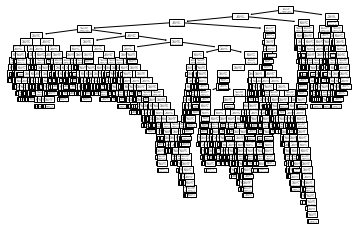

In [17]:
tree.plot_tree(clf)

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1000)
tree.plot_tree(clf,
               filled = True);
fig.savefig('df3.png')

In [19]:
sorted(zip(clf.feature_importances_, df.columns.tolist()[1:]), reverse=True)

[(0.313902182717463, 'koi_fpflag_ec'),
 (0.24234899688006428, 'koi_fpflag_nt'),
 (0.2283294615918201, 'koi_fpflag_co'),
 (0.21541935881065266, 'koi_fpflag_ss')]

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [20]:
# Create the GridSearchCV model
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [22]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [23]:
# Train the model with GridSearch

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.742, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.733, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.743, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.735, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.738, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.742, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.733, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.743, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.735, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   12.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.7547176882381621


# Save the Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_dt3.sav'
joblib.dump(model, filename)

['model_dt3.sav']